# Heart Disease Prediction

Во овој проект го користам датасетот од Kaggle -https://www.kaggle.com/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv.
Ќе користиме различни методи и алгоритми од машинско учење со цел да предвидиме дали дадена личност страда од заболување на срцето.

### Вчитување на потребни датотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Вчитување на датасет и негово разгледување со цел донесување на заклучоци

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Statstical Details Describe provides us with statistical information in the numerical format. we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.

#### Објаснување на 13 - те карактеристики (features)

Content
There are 13 attributes

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
 -- Value 0: typical angina
  -- Value 1: atypical angina
     -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
** -- Value 0: normal
** -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
** -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
st dpression se odnesuva na toa koga pri pravenje na ecg, vo ST segmentot se dobivaat signali koi se pod normalnite granici.
(ako vrema vrednost najmalce 2 ili nad 2 pri pravenje na stres test togash idicira reversible ischaemia)
* slope: the slope of the peak exercise ST segment
** -- Value 0: upsloping
** -- Value 1: flat
** -- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB
None


Забележуваме дека во датасетот нема податоци за кои имаме вредност 0.
Затоа нема потреба од исфрлање на податоци или пополнување на вредностите кои недостасуваат

### Барање на зависност помеѓу атрибутите

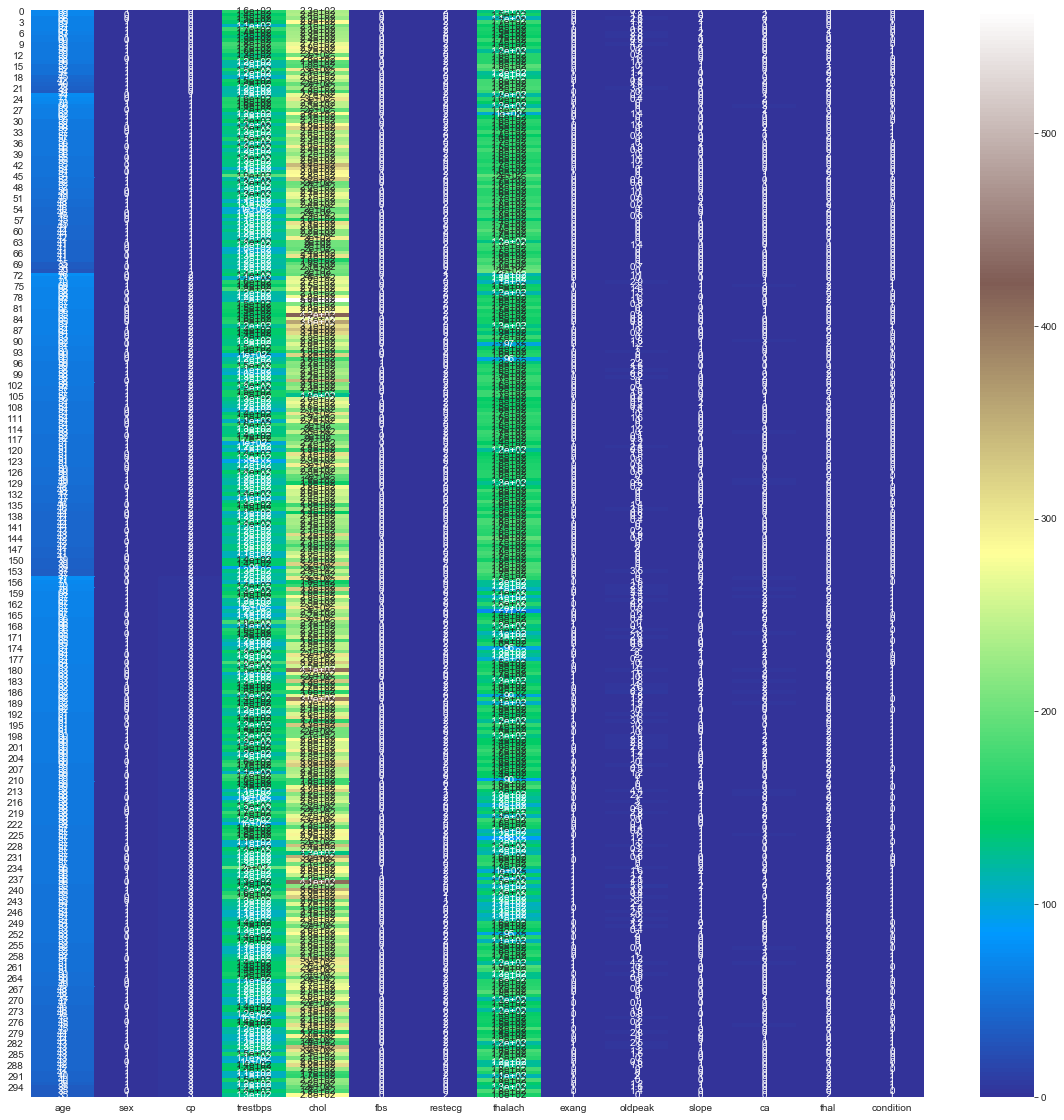

In [218]:
import seaborn as sns
plt.figure(figsize=(20,20))
g=sns.heatmap(df,annot=True,cmap="terrain")

Од мапата можеме на забележиме кои карактеристики (features) имаат влијание врз тоа дали ќе се појави срцева болест или не. Од мапата се гледа дека сите имаат позитивни коефициенти, освен thalach(максимален број на срцеви отчукување, односно максимален пулс кој се достигнува при некоја физичка активност) кој има негативен коефициент. 
Да го земеме на пример cp - cheast pain, значи ако има болка во градите поголема е веројатноста да се јави срцево заболување, бидејќи коефициентот е 0.41.
Исто така и exang, oldpeak и ca имаат коефициенти по 0.5.
Најголемо влијание од сите карактеристики има thal со коефициент од 0.52.

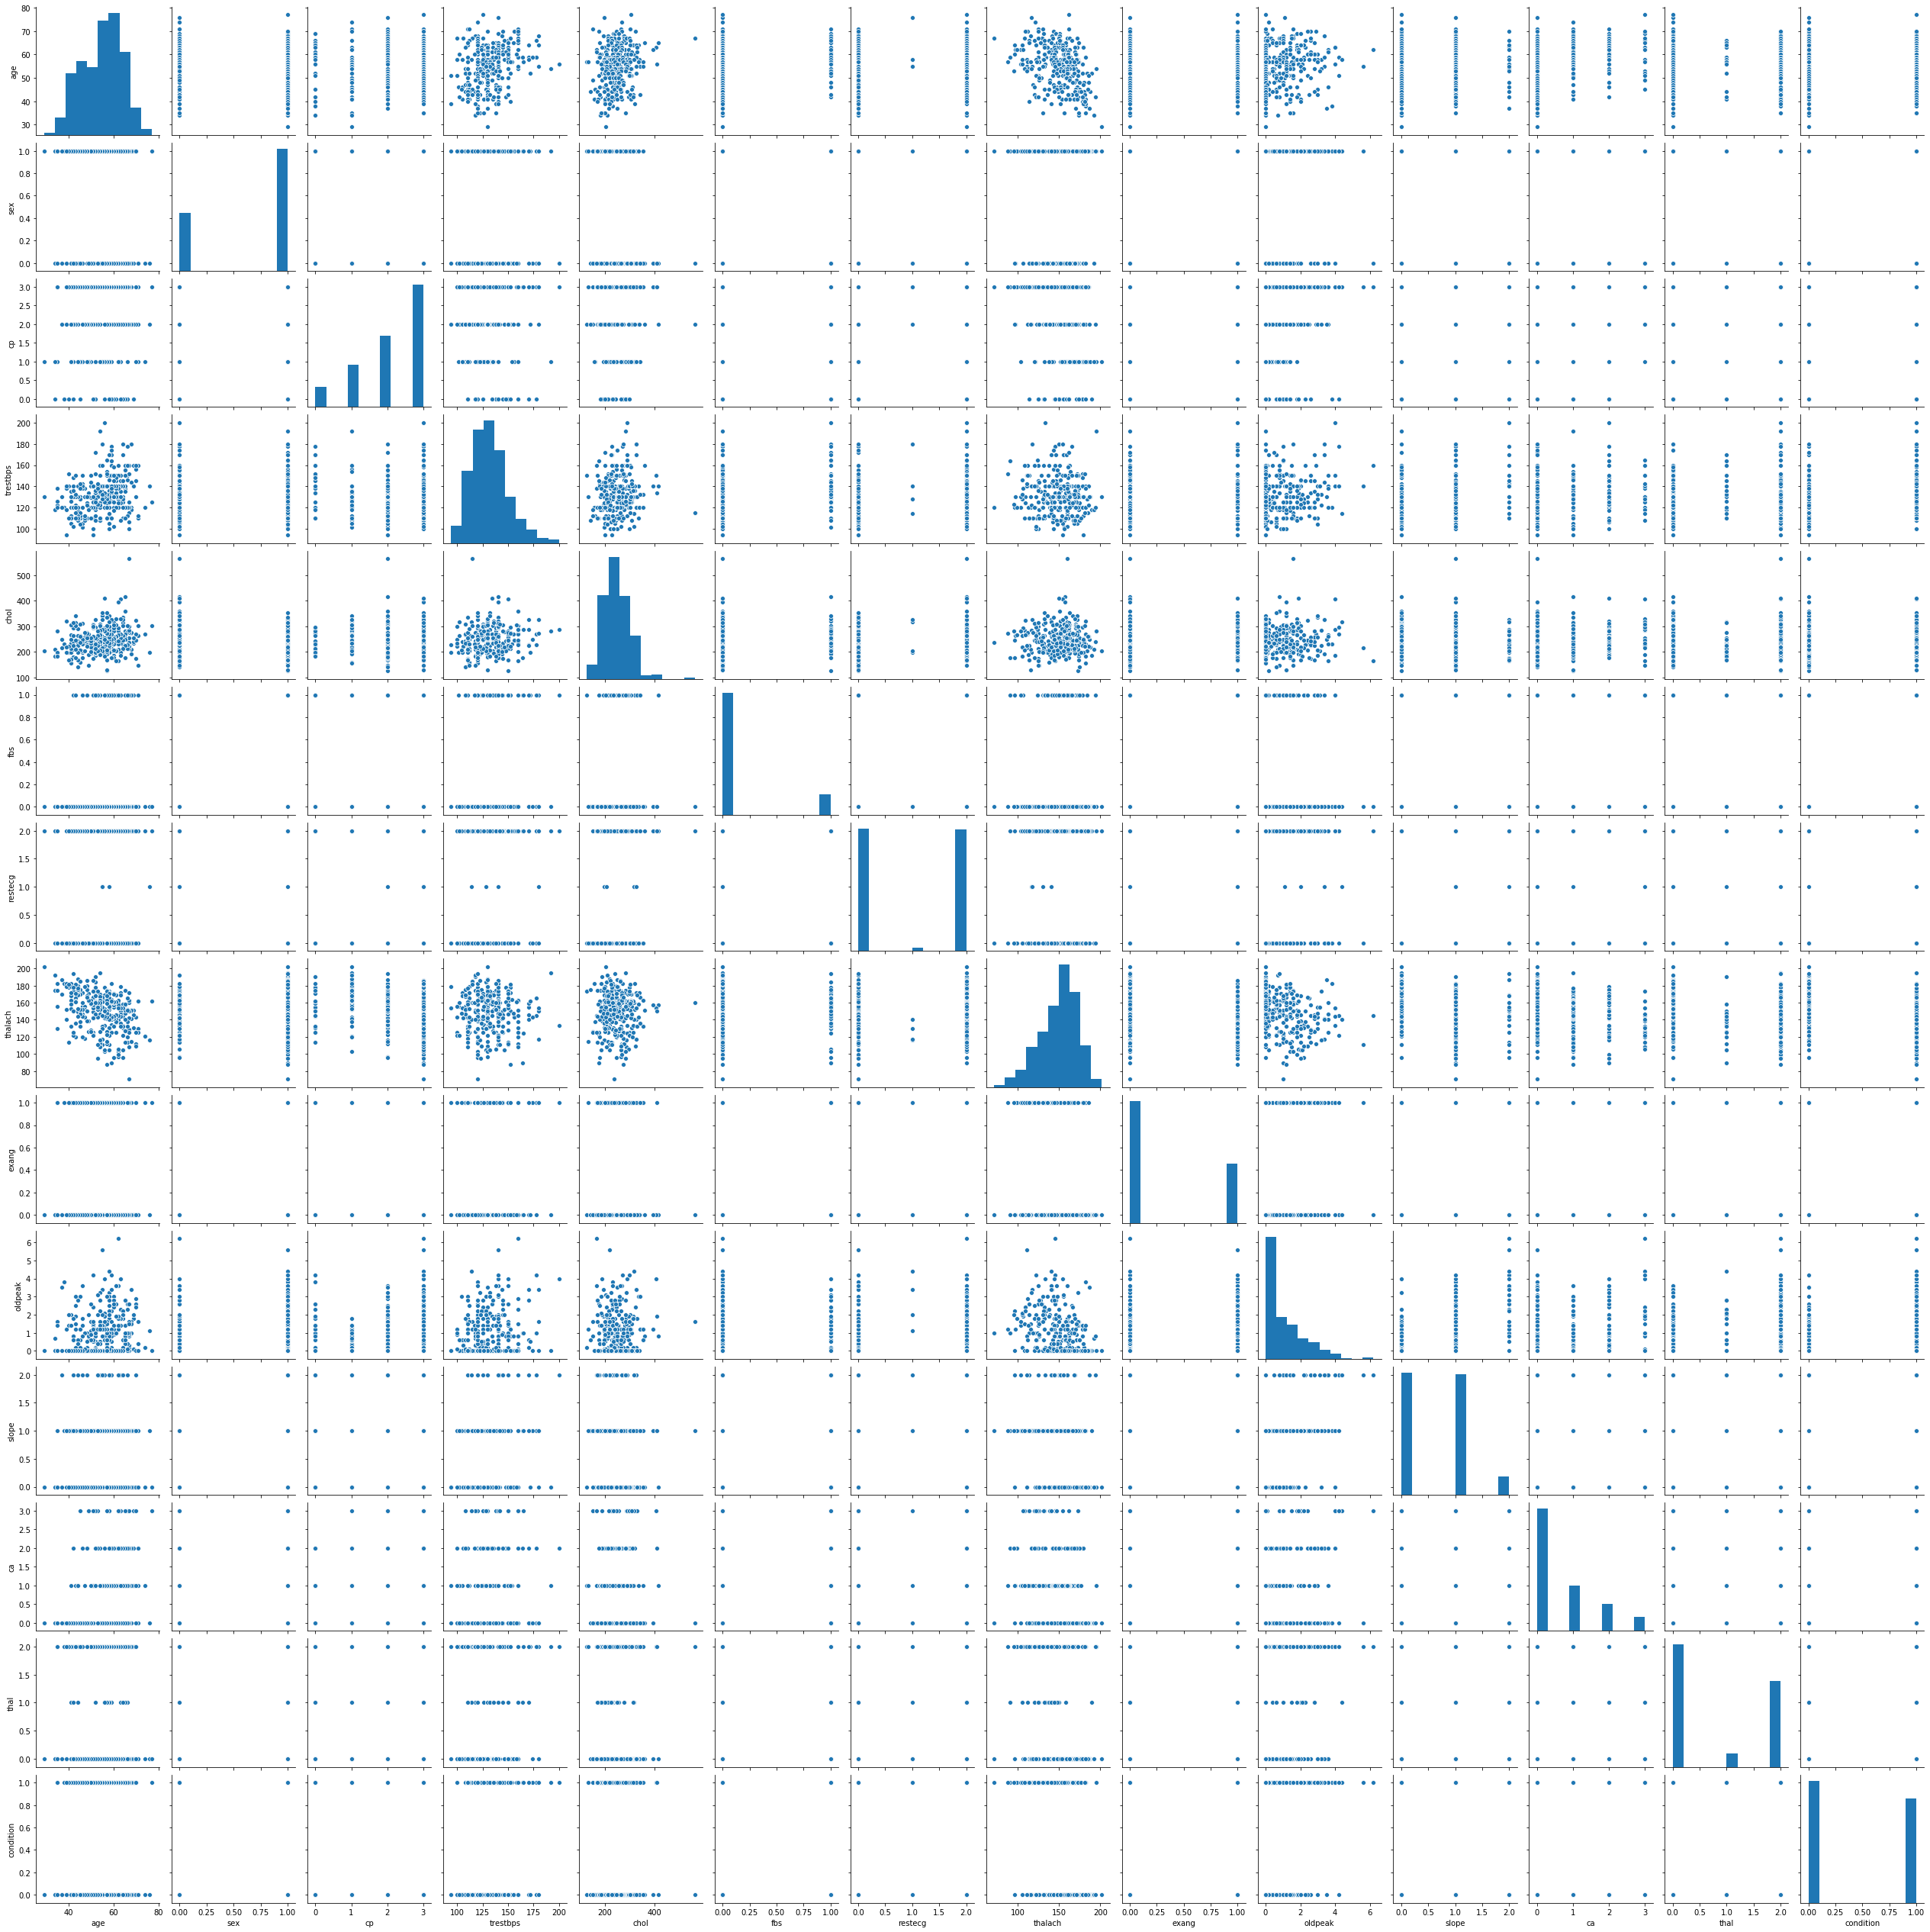

In [180]:
sns.pairplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12942F70>,
      dtype=object)

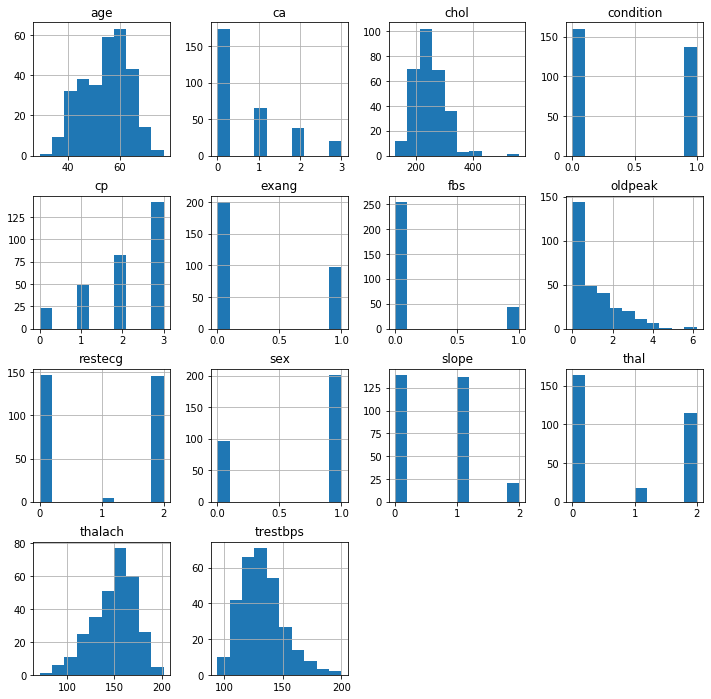

In [181]:
df.hist(figsize=(12,12), layout=(4,4))

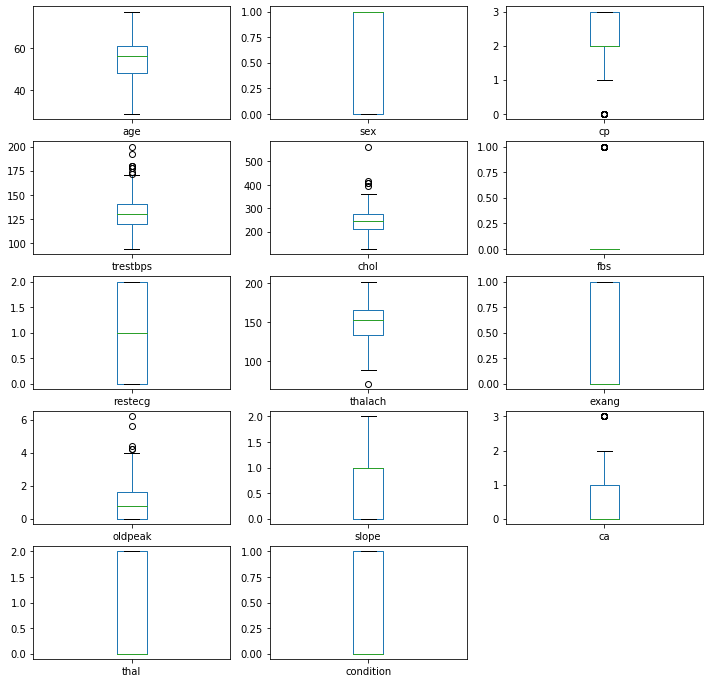

In [182]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()
#outliers????????????

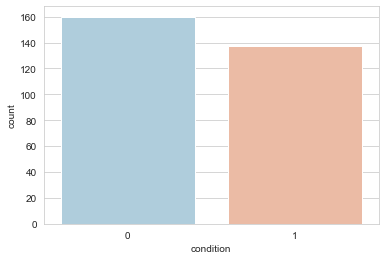

In [183]:
sns.set_style('whitegrid')
sns.countplot(x='condition',data=df,palette='RdBu_r')

Од претходниот график се забележува дека околу 160 од вкупниот број луѓе немаат срцеви заболувања, а околу 140 имаат срцево заболување.

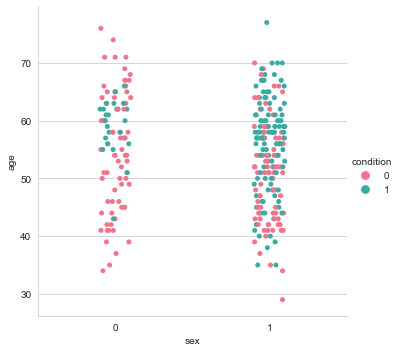

In [184]:
sns.catplot(data=df, x='sex', y='age',  hue='condition', palette='husl')

 * sex  0 - женско, 1 - машко
 * condtion 0 - нема срцево заболување 1 - има срцево заболување.
 * Женските со години во опсег од 30 до 80 помалце страдаат од срцево заболување од колку машките во истипт опсег на години.

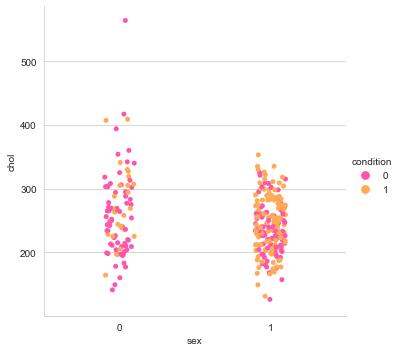

In [185]:
sns.catplot(data=df, x='sex', y='chol', hue='condition', palette='spring')

Иако женските имаат релативно поголеми нивоа на холестерол во крвта од колку машките, бројот на заболени жени е помал од бројот на заболени мажи.

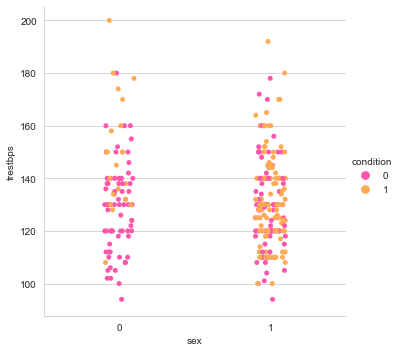

In [186]:
sns.catplot(data=df, x='sex', y='trestbps', hue='condition', palette='spring')

Можеме да забележиме дека мажите со крвен притисок иод 100 до 160 многу повеќе страдаат од срцеви забиолување од колку жените со ист крвен пртисок. А кога станува збор за притисок поголем од 160 и кај припадниците на двата пола доминираат срцевите заболувања.

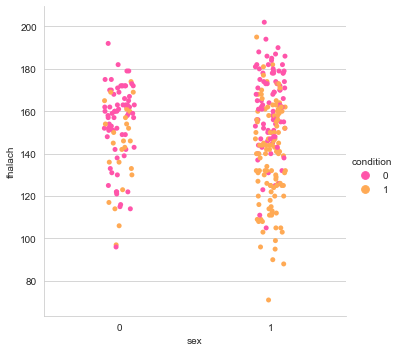

In [187]:
sns.catplot(data=df, x='sex', y='thalach', hue='condition', palette='spring')

Како што можеме да забелижиме, во случаеви кога пулсот и кај мажите и кај жените се движел од над 140 до под 200 бројот на заболени кај двата пола е помал. Додека пак кај мажите кога пулсот се движел од 60 до 140 број на заболени е драстично поголем во однос на здрави. Од ова може да се заклучи дека максималниот пулс достигнат при одредена физичка активност нема големо влиајние врз тоа дали се јавува заболување на срце или не. Ова произлегува од нивната негативна корелација, со зголемување на пулсот, бројот на случаеви на срцеви заболувања се намалува.

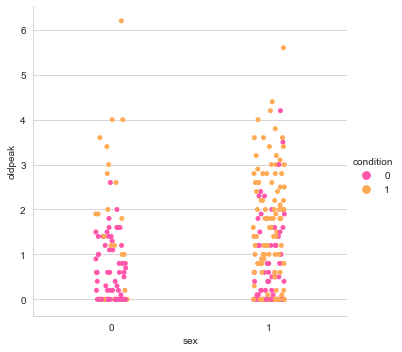

In [190]:
sns.catplot(data=df, x='sex', y='oldpeak', hue='condition', palette='spring')

Од графикот се гледа дека кога станива збор за женски пол кога врендноста е 1 или во граници помеѓу 1 и 2 тогаш присуството на срцеви болести е нешто поголемо, додека пак кога вредноста е 2 или поголема од два, тогаш мора да има присуство на срцева болест. Малку е поразлична ситуацијата за мажите во границите од 0 до 1 можеме да кажеме дека се релативно еднакви имањето и немањето на срцеви заболување, меѓутоа над 1 сигурно доминираат срцевите заболувања. Ова значи дека овој атрибут има големо врз нашиот таргет.

In [188]:
df['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

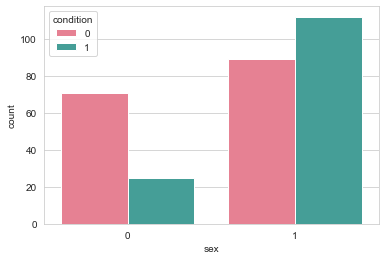

In [189]:
sns.countplot(x='sex', data=df, palette='husl', hue='condition')

Имаме 201 мажи и 96 жени

In [191]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

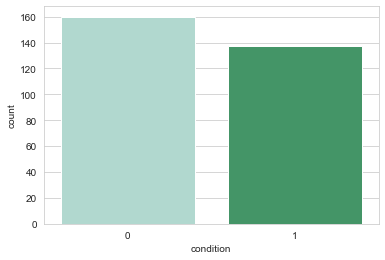

In [192]:
sns.countplot(x='condition',palette='BuGn', data=df)

Имаме 137 случаеви со срцеви заболувања

In [193]:
df['thal'].value_counts()

0    164
2    115
1     18
Name: thal, dtype: int64

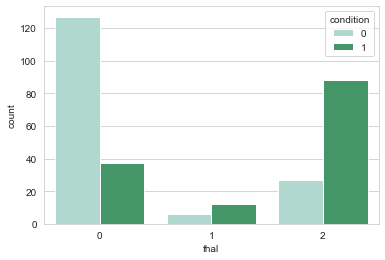

In [194]:
sns.countplot(x='thal',data=df, palette='BuGn',hue='condition')

 thal -  ни ги прикажува резултати од thallium стес тест, го мери протокот на крв до мозокот и зама 3 вредности:
 * 0 - normal (164)
 * 1 - fixed defect (115)
 * 2 - reversible defect (18)

In [195]:
df['ca'].value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

### Data Processing
 
По разгледувањето и објаснување на дата сетот дадено погоре можеме да забележиме дека има многу features кои имаат категорични вредности, за да ги претвориме таканаречените categorical features во dummy variables ќе го користиме методот 'get_dummies', а потоа ќе извршиме скалирање на вредностите, видејќи како што се гледа погоре имаме големи разлики во вредностите. На пример за age имаме вредности од 29 до 77 години, за chol од 126 до 564, а condition има вредности само 0 и 1, затоа имаме потреба од скалирање.
Gradient decent?

In [12]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,160,234,131,0.1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,140,239,151,1.8,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,150,226,114,2.6,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,110,211,144,1.8,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


Во табелата погоре можеме да забележиме дека се додадени нови колини кои одговараат на категорични вредности кои ги имавме претходно.

## Data scaling
### Standartization and Normalization

#### Normalization(Min-max Normalization)
- ни овозможува да ги скалираме вредностите помеѓу 0 и 1
- $ Xnorm = (X-Xmin)/(Xmax-Xmin) $

#### Standartization(StandardScaler)
- ни овозможува слалирање на вредностите базирано на стандарна нормална распределба(најчесто mean(mi) = 0, а  std(sigma) = 1)
- $ z = (x-mi)/sigma $

### Стандардизација

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [14]:
#from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler =  MinMaxScaler()
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


### Поделба да датасет

In [69]:
y = dataset['condition']
X = dataset.drop(['condition'], axis = 1)

In [17]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [18]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 5796
X_test- 2520
y_train- 207
y_test- 90


### K Neighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [163]:
kNN = KNeighborsClassifier()
model_kNN = kNN.fit(X_train, y_train)
prediction_kNN = model_kNN.predict(X_test)

In [24]:
accuracy_score(y_test,prediction_kNN)

0.7666666666666667

### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
NB = GaussianNB()
model_NB = NB.fit(X_train, y_train)
prediction_NB = model_NB.predict(X_test)

In [27]:
accuracy_score(y_test,prediction_NB)

0.8

### Linear SVM

In [28]:
from sklearn.svm import SVC

In [234]:
C=1
SVM = SVC(kernel = "linear",C=C)
model_SVM = SVM.fit(X_train,y_train)
prediction_SVM = model_SVM.predict(X_test)

In [235]:
accuracy_score(y_test,prediction_SVM)

0.7777777777777778

In [236]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [238]:
z = model_SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

ValueError: X.shape[1] = 2 should be equal to 28, the number of features at training time

### Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
LR = LogisticRegression()
model_LR = LR.fit(X_train,y_train)
prediction_LR = model_LR.predict(X_test)

In [200]:
accuracy_score(y_test,prediction_LR)

0.7777777777777778

###  Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
DTC = DecisionTreeClassifier()
model_DTC = DTC.fit(X_train,y_train)
prediction_DTC = model_DTC.predict(X_test)

In [135]:
accuracy_score(y_test,prediction_DTC)

0.6888888888888889

### Random Forest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
RFC = RandomForestClassifier()
model_RFC = RFC.fit(X_train,y_train)
prediction_RFC = model_RFC.predict(X_test)

In [131]:
accuracy_score(y_test,prediction_RFC)

0.7555555555555555

### Neural Network

### Gradient Boosting Tree

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
GBF = GradientBoostingClassifier()
model_GBF = GBF.fit(X_train, y_train)
prediction_GBF = model_GBF.predict(X_test)

In [45]:
accuracy_score(y_test,prediction_GBF)

0.7333333333333333

##### Razgledajj!!!!!!

In [46]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [ ]:
score.mean()

### SGD Classifier

In [50]:
from sklearn.linear_model import SGDClassifier

In [51]:
clf = SGDClassifier(random_state = 0)
model_clf = clf.fit(X_train, y_train)

In [52]:
predict_clf = model_clf.predict(X_test) # vrednostite shto se 0 ni kazuaav kolku vrednosti ne uspeal da predvidi?
accuracy_score(y_test, predict_clf)

0.7666666666666667

### Performace measurement

### Measurig Accuracy Using Cross - Validation
#### StratifiedKFold - neuspeshno!

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [54]:
#X_train.insert(0,"Index",list(range(0, len(X_train))))

In [65]:
X.head()
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [79]:
skfolds = StratifiedKFold(n_splits= 4, random_state=100, shuffle = False)

In [80]:
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(clf)
    X_train_fold = X[train_index]
    y_train_fold = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred) ))

KeyError: "None of [Int64Index([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,\n            ...\n            287, 288, 289, 290, 291, 292, 293, 294, 295, 296],\n           dtype='int64', length=222)] are in the [columns]"

## Cross - validation and Confusion Matrix

In [95]:
from sklearn.model_selection import cross_val_score

In [158]:
from sklearn.model_selection import cross_val_predict

In [166]:
from sklearn.metrics import confusion_matrix

In [168]:
from sklearn.metrics import precision_score, recall_score

### KNN

In [160]:
score_kNN = cross_val_score(kNN, X, y, cv=10)
score_kNN

array([0.6       , 0.73333333, 0.8       , 0.9       , 0.86666667,
       0.86666667, 0.96666667, 0.82758621, 0.68965517, 0.82758621])

In [176]:
print("Точност kNN: %0.2f (+/- %0.2f)" % (score_kNN.mean(), score_kNN.std() * 2))

Точност kNN: 0.81 (+/- 0.20)


In [216]:
y_kNN_pred = cross_val_predict(kNN, X, y, cv=10)
mkNN = confusion_matrix(y, y_kNN_pred)
print(mkNN)

[[134  26]
 [ 31 106]]


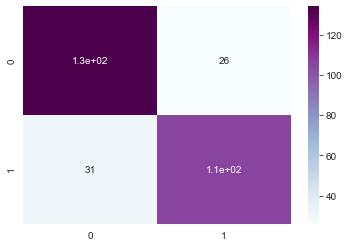

In [215]:
sns.heatmap(mkNN, annot=True,cmap='BuPu')

* 123 - (точно класифицирани како единици (не нули) TRUE NEGATIVE
* 26 - (не точно класифицирани како нули)FALSE POSITIVE
* 31 - (не точно класифицирани како не- нули?)FALSE NEGATIVE
* 106 - (точно класифицирани како нули) TRUE POSITIVE 

#### Precision kNN
Прецизноста се однесува на позитивни предвидени вредности, тоа е втората колона од confusion matrix (false positive и fale negative)

$ Precison = (True Positive)/(True Positive + False Positive) $

In [173]:
preci_kNN = precision_score(y, y_kNN_pred)

In [175]:
print("Прецизност kNN: %0.2f" % preci_kNN)

Прецизност kNN: 0.80


#### Sensitivity kNN

$ Sensitivity = (TruePositive)/(TruePositive + FalseNegative) $

In [179]:
sensi_kNN = recall_score(y, y_kNN_pred)
print("Чувствителност kNN: %0.2f" % sensi_kNN)

Чувствителност kNN: 0.77


### NB

In [109]:
score_NB = cross_val_score(NB, X, y, cv=10)
score_NB

array([0.33333333, 0.63333333, 0.86666667, 0.86666667, 0.86666667,
       0.86666667, 1.        , 0.86206897, 0.75862069, 0.75862069])

In [110]:
print("Точност: %0.2f (+/- %0.2f)" % (score_NB.mean(), score_NB.std() * 2))

Точност: 0.78 (+/- 0.35)


## Suport Vector Machine

### Linear SVC

In [239]:
score_SVM = cross_val_score(SVM, X, y, cv=10)

In [241]:
print("Точност Linear SVC: %0.2f (+/- %0.2f)" % (score_SVM.mean(), score_SVM.std() * 2))

Точност Linear SVC: 0.81 (+/- 0.24)


In [243]:
y_LinearSVM_pred = cross_val_predict(SVM, X, y, cv=10)
mLinearSVM = confusion_matrix(y, y_LinearSVM_pred)
print(mLinearSVM)

[[132  28]
 [ 29 108]]


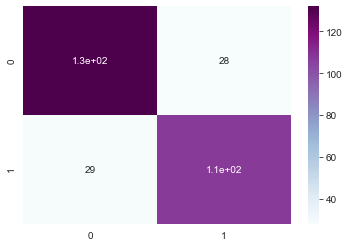

In [244]:
sns.heatmap(mLinearSVM, annot=True,cmap='BuPu')

In [249]:
preci_SVM = precision_score(y, y_LinearSVM_pred)
print("Прецизност Linear SVM : %0.2f" % preci_SVM)

Прецизност Linear SVM : 0.79


In [250]:
sensi_SVM = recall_score(y, y_LinearSVM_pred)
print("Чувствителност kNN: %0.2f" % sensi_SVM)

Чувствителност kNN: 0.79


### Polynomial Kernel

In [ ]:
C = 1.0
PolySVM = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X, y)

### svm

In [145]:
score_svm = cross_val_score(svm, X, y, cv=10)
score_svm

array([0.56666667, 0.73333333, 0.86666667, 0.9       , 0.8       ,
       0.9       , 1.        , 0.86206897, 0.75862069, 0.79310345])

In [146]:
print("Точност: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))

Точност: 0.82 (+/- 0.22)


### LR

In [147]:
score_LR = cross_val_score(LR, X, y, cv=10)
score_LR

array([0.53333333, 0.76666667, 0.86666667, 0.9       , 0.8       ,
       0.9       , 1.        , 0.82758621, 0.79310345, 0.82758621])

In [148]:
print("Точност: %0.2f (+/- %0.2f)" % (score_LR.mean(), score_LR.std() * 2))

Точност: 0.82 (+/- 0.23)


### RFC

In [210]:
score_RFC = cross_val_score(RFC, X, y, cv=10)
score_RFC

array([0.5       , 0.56666667, 0.83333333, 0.8       , 0.83333333,
       0.96666667, 0.96666667, 0.82758621, 0.75862069, 0.72413793])

In [150]:
print("Точност: %0.2f (+/- %0.2f)" % (score_RFC.mean(), score_RFC.std() * 2))

Точност: 0.79 (+/- 0.35)


### DTC

In [151]:
score_DTC = cross_val_score(DTC, X, y, cv=10)
score_RFC

array([0.56666667, 0.46666667, 0.73333333, 1.        , 0.83333333,
       0.93333333, 1.        , 0.89655172, 0.65517241, 0.79310345])

In [152]:
print("Точност: %0.2f (+/- %0.2f)" % (score_DTC.mean(), score_DTC.std() * 2))

Точност: 0.69 (+/- 0.39)


### GBF

In [153]:
score_GBF = cross_val_score(GBF, X, y, cv=10)
score_GBF

array([0.53333333, 0.6       , 0.7       , 0.8       , 0.73333333,
       0.86666667, 0.9       , 0.79310345, 0.48275862, 0.82758621])

In [154]:
print("Точност: %0.2f (+/- %0.2f)" % (score_GBF.mean(), score_GBF.std() * 2))

Точност: 0.72 (+/- 0.27)


#### Барање на граница на точност рачно

Ова се прави со цел да не се следат слепо добиените резултати.

In [157]:
tocnost =1 - ( sum(y_train) / len(y_train) )
print(tocnost)

0.5410628019323671


Оваа едноставна проберка ни кажува дека 54,1% од испитаниците имаа condition = 1. Секој пат кога ќе кажеме дека некој од испитаницте има срцеви заболувања тоа е со точност од 54.1%